<center> <b><font size = '6'> 
    Bank Telemarketing Prediction
<b/><center/>

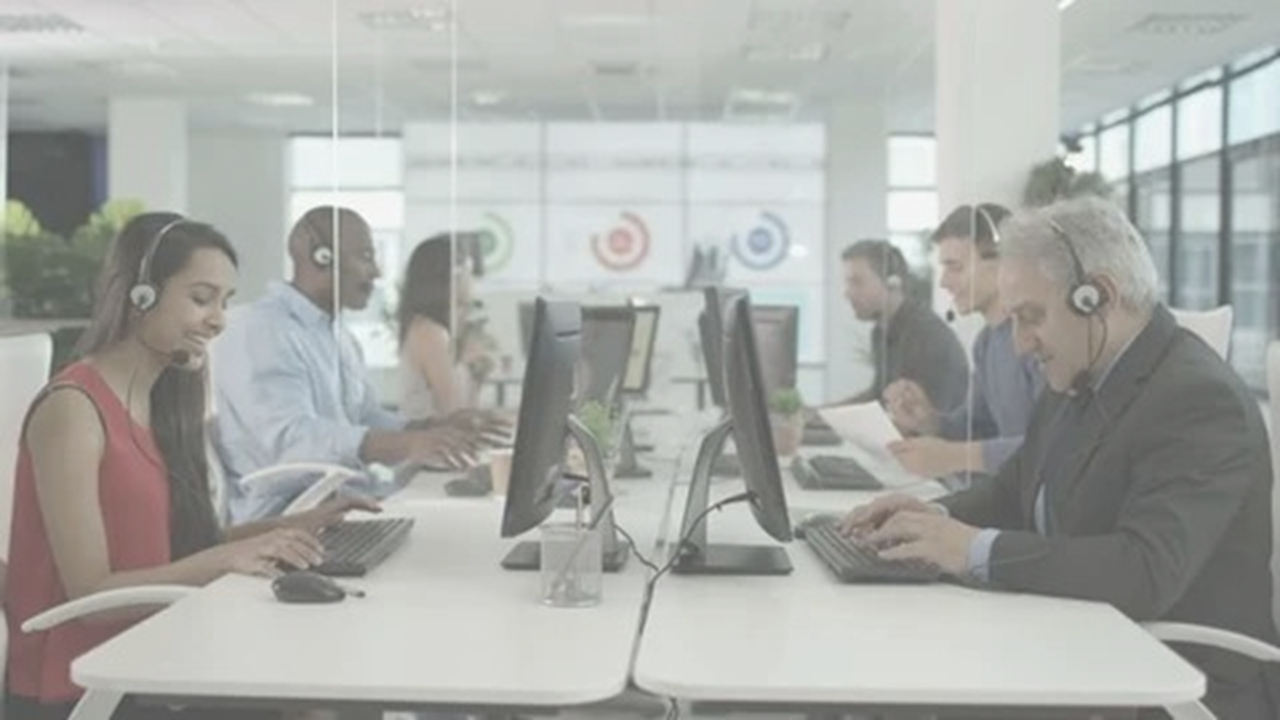

In [1]:
from IPython.display import display, Image
display(Image(r'C:\Users\domingosdeeularia\...\BankTelemarketingCover.png'))

## Summary

The objective of this project was to analyse, develop and deploy a success prediction model of a telemarketing campaign from a portuguese retail bank. For this task, it was considered the following attributes:

1. age — age of the customer contacted (integer);
2. job — the job or occupation of the customer (string);
3. marital — marital status of the customer (string);
4. education — education level of the customer (string);
5. default — whether the customer has defaulted any loan (string);
6. balance — cash balance in the bank account of the customer (int);
7. housing — whether the customer has taken any housing loan (string);
8. loan — whether the customer has taken any personal loan (string);
9. contact — the means through which the customer has been contacted (string);
10. day — day of month on which a the customer was contacted (integer);
11. month — month in which the customer is contacted during the campaign (string);
12. duration — the total duration of the call during the camapaign (integer);
13. campaign — the number of campaign in which the customer was contacted(integer);
14. pdays — the number of days passed by since the customer was reached by the bank for any of the other products excepting long-term deposits, with ‘-1’ meaning that the customer has never been reached for any product (integer);
15. previous — the number of times the customer has been reached in the previous campaigns for any of the other products excepting long-term deposits (integer);
16. poutcome — the campaign outcome of the previous contacts for any of the products other than long term deposits (string);
17. y — whether the customer purchased the long term deposit or not (string).

## Main Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Preprocessing and training
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, roc_curve, precision_recall_curve,
confusion_matrix, ConfusionMatrixDisplay, classification_report)

# Function to retrieve candidate models evaluation metrics
from eval_models.eval_models import *


# Omitting warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Data Wrangling

In [3]:
# Reading the data csv file as a Pandas dataframe

file_path = (r'C:\Users\domingosdeeularia\...'
r'\BankTelemarketingDataset.csv')
df = pd.read_csv(file_path, sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Main info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Creating lists for numerical and ctegorical atributtes

num_cols = list(df.dtypes[df.dtypes != object].index)
cat_cols = list(df.dtypes[df.dtypes == object].index)

In [6]:
# Statiscical summary (nmeric attributes)

df_num = df[num_cols]
df_num.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Statiscical summary (categorical attributes)

df_cat = df[cat_cols]
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


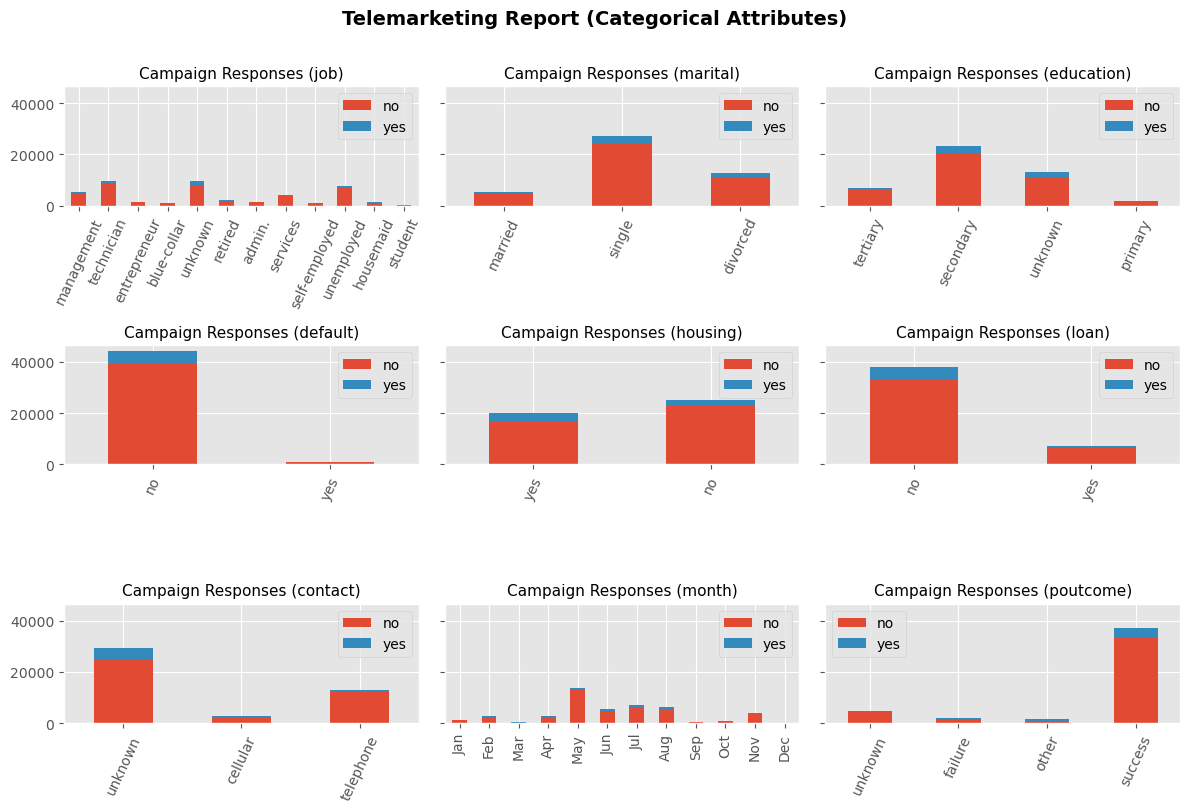

In [8]:
# Campaign report for categorical attributes

fig, axs = plt.subplots(figsize = (12, 8), nrows = 3, ncols = 3, sharey = True)
for i, ax in enumerate(fig.axes):
    
    data_cat = df_cat.iloc[:, [-1, i]].value_counts().unstack().T

    if cat_cols[i] == 'month':    
        data_cat.index = pd.to_datetime(data_cat.index, format = '%b')
        data_cat.sort_index(inplace = True)  
        data_cat.index = data_cat.index.strftime('%b')
        data_cat.plot.bar(stacked = True, ax = ax)
        ax.set_title(f'Campaign Responses ({df_cat.columns[i]})', fontsize = 11)
        ax.set_xlabel('')         
        ax.legend()   
    
    else:       
        data_cat = df_cat.iloc[:, [-1, i]].value_counts().unstack().T
        data_cat.plot.bar(stacked = True, ax = ax)
        ax.set_title(f'Campaign Responses ({df_cat.columns[i]})', fontsize = 11)
        ax.set_xlabel('')          
        ax.legend()
        ax.set_xticks(ticks = np.arange(len(data_cat.index)), labels = df_cat.iloc[:, i].unique(), rotation = 65)
        
plt.suptitle('Telemarketing Report (Categorical Attributes)', y = 1.01, fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [9]:
# Creating dataframe to make report for numerical attributes (including the 'y' attribute)

num_cols_response = list(set(df.columns) - set(df_cat.columns[:-1]))

df_num_report = df[num_cols_response]
df_num_report

,balance,previous,y,age,campaign,duration,pdays,day
0,2143,0,no,58,1,261,-1,5
1,29,0,no,44,1,151,-1,5
2,2,0,no,33,1,76,-1,5
3,1506,0,no,47,1,92,-1,5
4,1,0,no,33,1,198,-1,5
...,...,...,...,...,...,...,...,...
45206,825,0,yes,51,3,977,-1,17
45207,1729,0,yes,71,2,456,-1,17
45208,5715,3,yes,72,5,1127,184,17
45209,668,0,no,57,4,508,-1,17


In [10]:
# Since we have '-1' for number of passed days in case the customer has never been contacted, it will be replaced with 0 to make
# the aggregation easier

df_num_report['pdays'] = df_num_report.pdays.map(lambda cell: 0 if cell == -1 else cell)
df_num_report

,balance,previous,y,age,campaign,duration,pdays,day
0,2143,0,no,58,1,261,0,5
1,29,0,no,44,1,151,0,5
2,2,0,no,33,1,76,0,5
3,1506,0,no,47,1,92,0,5
4,1,0,no,33,1,198,0,5
...,...,...,...,...,...,...,...,...
45206,825,0,yes,51,3,977,0,17
45207,1729,0,yes,71,2,456,0,17
45208,5715,3,yes,72,5,1127,184,17
45209,668,0,no,57,4,508,0,17


In [11]:
# Aggregate dataframe for numerical attributes

df_num_agg = df_num_report.groupby('y').mean()
df_num_agg

,balance,previous,age,campaign,duration,pdays,day
y,,,,,,,
no,1303.714969,0.502154,40.838986,2.846350,221.182806,37.262261,15.892290
yes,1804.267915,1.170354,41.670070,2.141047,537.294574,69.342787,15.158253


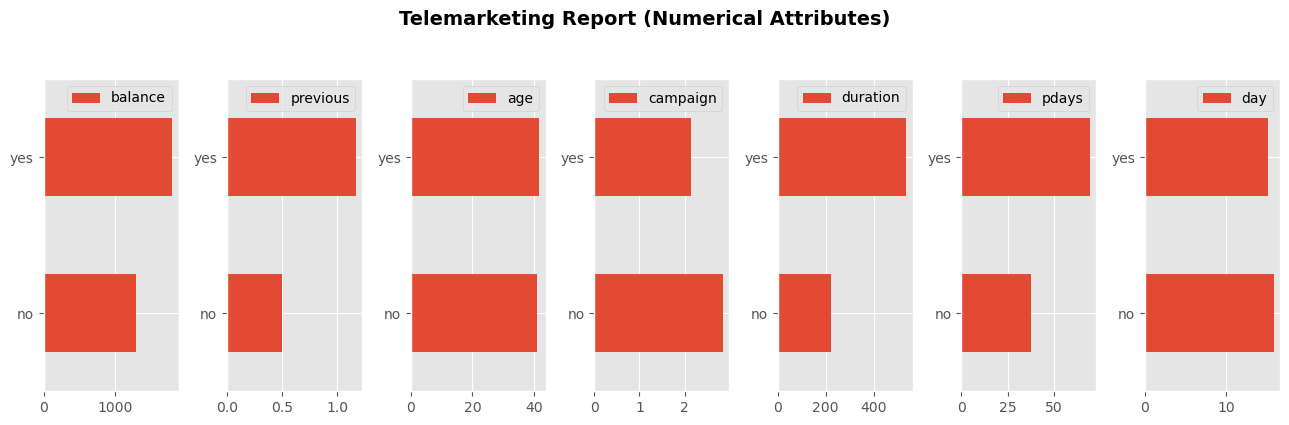

In [12]:
# Campaign report for numerical attributes

fig, axes = plt.subplots(figsize = (13, 4), ncols = 7)

for i, col in enumerate(df_num_agg.columns):    
    df_num_agg[col].plot.barh(ax = axes[i])
    axes[i].legend(labels = [col])
    axes[i].set_xlabel('')   
    axes[i].set_ylabel('')
plt.suptitle('Telemarketing Report (Numerical Attributes)', y = 1.05, fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

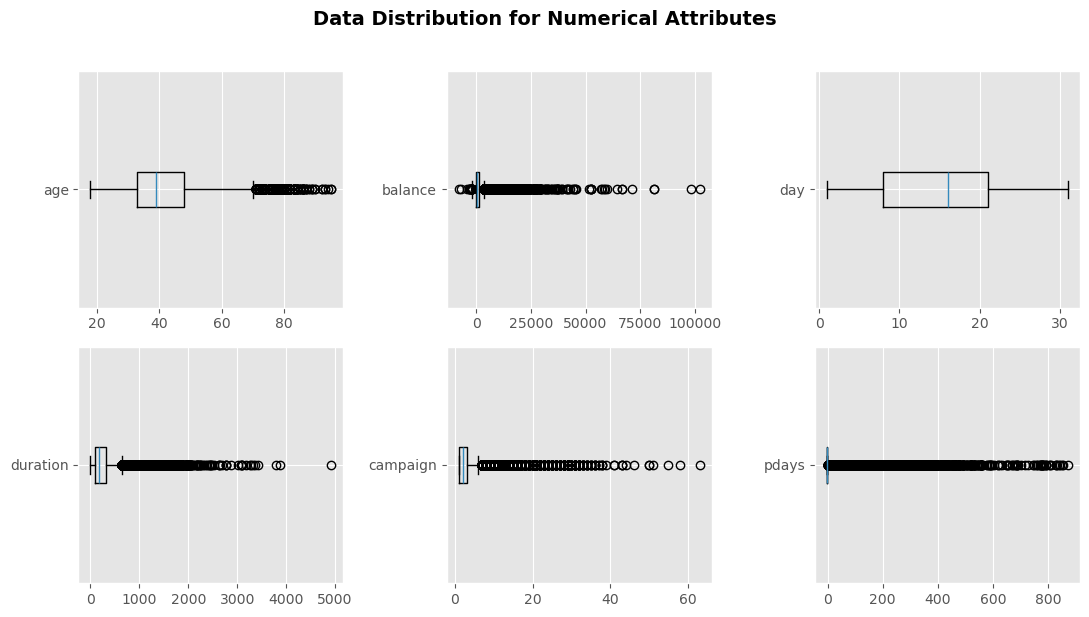

In [13]:
# Box plots for numerical columns

box_plots, axes = plt.subplots(figsize = (11, 6), nrows = 2, ncols = 3)

for i, ax in enumerate(box_plots.axes):    
    ax.boxplot(df[num_cols].iloc[:, i], tick_labels = [num_cols[i]], vert = False)
plt.suptitle('Data Distribution for Numerical Attributes', fontweight = 'bold', y = 1.02, fontsize = 14)
plt.tight_layout()
plt.show()

In [14]:
# Transforming columns

df['y'] = LabelEncoder().fit_transform(df.y) # Passing output categories to numeric values
cols_with_outliers = list(set(num_cols) - {'day'})

cols_transformer = ColumnTransformer(
    transformers = [
        ('num_out', RobustScaler(), cols_with_outliers), # Scaling numeric columns to address outliers
        ('num_norm', StandardScaler(), ['day']), # Standardizing the 'day' column
    ])

In [15]:
# Transformation of columns

data_transf = cols_transformer.fit_transform(df[cols_with_outliers + ['day']])
data_transf

array([[ 1.25000000e+00,  0.00000000e+00,  1.26666667e+00, ...,
         3.75000000e-01,  0.00000000e+00, -1.29847633e+00],
       [-3.08997050e-01,  0.00000000e+00,  3.33333333e-01, ...,
        -1.34259259e-01,  0.00000000e+00, -1.29847633e+00],
       [-3.28908555e-01,  0.00000000e+00, -4.00000000e-01, ...,
        -4.81481481e-01,  0.00000000e+00, -1.29847633e+00],
       ...,
       [ 3.88421829e+00,  3.00000000e+00,  2.20000000e+00, ...,
         4.38425926e+00,  1.85000000e+02,  1.43418183e-01],
       [ 1.62241888e-01,  0.00000000e+00,  1.20000000e+00, ...,
         1.51851852e+00,  0.00000000e+00,  1.43418183e-01],
       [ 1.86061947e+00,  1.10000000e+01, -1.33333333e-01, ...,
         8.37962963e-01,  1.89000000e+02,  1.43418183e-01]])

In [16]:
# A new dataframe udating the transformed predictors

df_transf = df.copy()
df_transf[cols_with_outliers + ['day']] = data_transf
df_transf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.266667,management,married,tertiary,no,1.250000,yes,no,unknown,-1.298476,may,0.375000,-0.5,0.0,0.0,unknown,0
1,0.333333,technician,single,secondary,no,-0.308997,yes,no,unknown,-1.298476,may,-0.134259,-0.5,0.0,0.0,unknown,0
2,-0.400000,entrepreneur,married,secondary,no,-0.328909,yes,yes,unknown,-1.298476,may,-0.481481,-0.5,0.0,0.0,unknown,0
3,0.533333,blue-collar,married,unknown,no,0.780236,yes,no,unknown,-1.298476,may,-0.407407,-0.5,0.0,0.0,unknown,0
4,-0.400000,unknown,single,unknown,no,-0.329646,no,no,unknown,-1.298476,may,0.083333,-0.5,0.0,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.800000,technician,married,tertiary,no,0.278024,no,no,cellular,0.143418,nov,3.689815,0.5,0.0,0.0,unknown,1
45207,2.133333,retired,divorced,primary,no,0.944690,no,no,cellular,0.143418,nov,1.277778,0.0,0.0,0.0,unknown,1
45208,2.200000,retired,married,secondary,no,3.884218,no,no,cellular,0.143418,nov,4.384259,1.5,185.0,3.0,success,1
45209,1.200000,blue-collar,married,secondary,no,0.162242,no,no,telephone,0.143418,nov,1.518519,1.0,0.0,0.0,unknown,0


## Model Training

In [17]:
# Target and predictor

y, X = df_transf.y, df_transf.iloc[:, :-1]
X = pd.get_dummies(X, drop_first = True)

In [18]:
# Dimensionality Reduction

X_scaled = StandardScaler().fit_transform(X)
principal_components = PCA(n_components = 2).fit_transform(X_scaled)
df_pca = pd.DataFrame(principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
df_pca['y'] = df_num_report.y

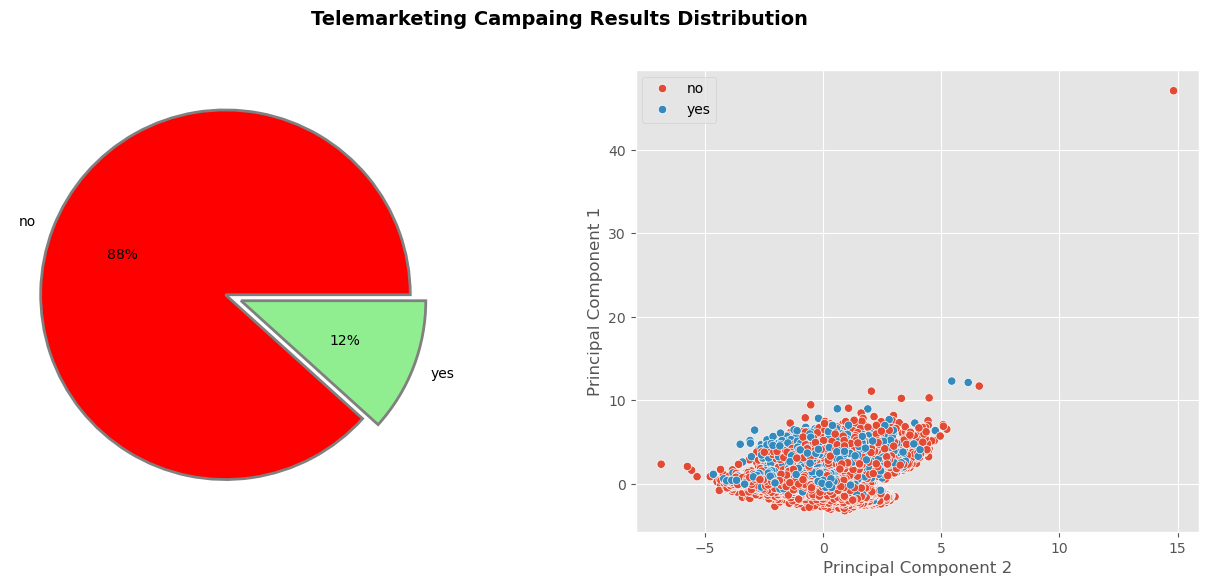

In [19]:
# Visualizing the classes distribution


fig, axes = plt.subplots(ncols = 2, figsize = (16, 6))

df_pca.y.value_counts().plot.pie(autopct = '%.f%%', explode = (0.09, 0), wedgeprops = {'linewidth':2, 'edgecolor': 'grey'},
                            colors = ['r', 'lightgreen'], ax = axes[0])
axes[0].set_ylabel('')
sns.scatterplot(data = df_pca, y = 'Principal Component 1', x = 'Principal Component 2', hue = 'y', ax = axes[1])
axes[1].legend()
plt.suptitle('Telemarketing Campaing Results Distribution', fontweight = 'bold', fontsize = 14)
plt.show()

In [20]:
# As plots above illustrate, we have an imbalanced dataset (0.88:0.12). So, to address this problem, it will be considered the use of an 
# oversampling technique, more specifically SMOTE

seed = 7
smote = SMOTE(random_state = seed)

X_bal, y_bal = smote.fit_resample(X, y)
y_bal.value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

In [21]:
# Splitting data into train and test sets to further make some prediction 

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = seed)

In [22]:
# Candidate models

forest_clf, knn_clf = RandomForestClassifier(random_state = seed), KNeighborsClassifier()
candidate_models = {'Random Forest': forest_clf, 
                   'KNN': knn_clf}

In [23]:
# Scores evaluation

scores, best_model_pipeline = eval_class(candidate_models, X_train, y_train)
scores

,Model,Mean Score (F1)
1,KNN,0.943638
0,Random Forest,0.876137


In [24]:
# Best model pipeline

best_model_pipeline

Pipeline(steps=[('classifier', KNeighborsClassifier())])

In [25]:
# Fittng the best model and making predictions on test set

best_model = best_model_pipeline.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [26]:
# Evaluation metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7926
           1       0.88      0.99      0.93      8043

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



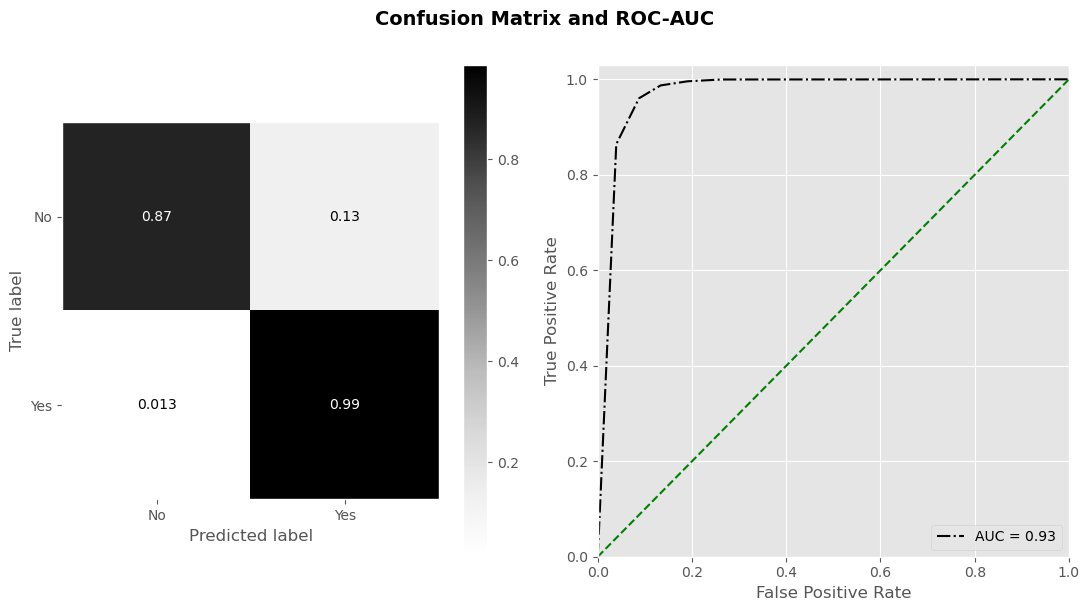

In [27]:
# Confusion Matrix and ROC-AUC

fig, axes = plt.subplots(figsize = (11, 6), ncols = 2)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis = 1)[:, np.newaxis]
roc_auc_Score = roc_auc_score(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix_norm).plot(cmap = 'Greys', ax = axes[0])
axes[0].set_xticks(ticks = np.unique(y), labels = ['No', 'Yes'])
axes[0].set_yticks(ticks = np.unique(y), labels = ['No', 'Yes'])
axes[0].grid(False)

# Plotting the AUC-ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

axes[1].plot(fpr, tpr, 'k-.', label = f'AUC = {str(round(roc_auc_Score, 2))}')
axes[1].plot([0,1], [0,1], 'g--')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylim([0, 1.03])
axes[1].set_xlim([0, 1])
axes[1].legend(loc = 'lower right')

plt.suptitle('Confusion Matrix and ROC-AUC', fontsize = 14, fontweight = 'bold', y = 1.01)
plt.tight_layout()
plt.show()

##  Data Provenance

<p>
  <strong>Source:</strong>
  <a href="https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X?via%3Dihub" target="_blank">
    A Data-Driven Approach to Predict the Success of Bank Telemarketing.
  </a>
  Decision Support Systems, Elsevier, 62:22-31, June 2014.
  <br>
  <strong>License:</strong>
  <a href="https://creativecommons.org/publicdomain/zero/1.0/" target="_blank">
    CC0: Public Domain.
  </a>
  <br>
  <em>Further details about the attributes can be found</em> 
  <a href="https://github.com/venkatesh-eranti/clustering_Bank-Telemarketing-Campaign-Case-Study/blob/main/Attribute%20details.xlsx" target="_blank">
    here.
  </a>
  <br><br>
  <em>Last accessed on October 12, 2024.</em>
</p>


                 ________  ________   _______   ______
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ /
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  
